In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, input_size, num_nodes=10, initial_lr=0.2):
        self.num_nodes = num_nodes
        self.weights = np.random.rand(num_nodes, input_size)
        self.initial_lr = initial_lr
        self.lr = initial_lr
        self.neighborhood_size = None  # Will be updated during training

    def train(self, X, epochs):
        for epoch in range(epochs):
            # Adjust neighborhood size
            if epoch < epochs // 3:
                self.neighborhood_size = 2
            elif epoch < 2 * epochs // 3:
                self.neighborhood_size = 1
            else:
                self.neighborhood_size = 0
            for x in X:
                self.update_weights(x)
            

    def update_weights(self, x):
        winner = self.find_winner(x)
        indices = np.arange(self.num_nodes)
        # Circular distance calculation
        distances = np.minimum(np.abs(indices - winner), self.num_nodes - np.abs(indices - winner))
        neighbor_indices = indices[distances <= self.neighborhood_size]
        # Update weights
        for i in neighbor_indices:
            self.weights[i] += self.lr * (x - self.weights[i])

    def find_winner(self, x):
        distances = np.linalg.norm(self.weights - x, axis=1)
        winner = np.argmin(distances)
        return winner

    def plot_tour(self, cities):
        plt.figure(figsize=(8, 6))
        # Plot cities
        plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='Cities', zorder=2)
        # Annotate cities
        for i, (x, y) in enumerate(cities):
            plt.text(x, y, f"City {i+1}", fontsize=9, ha='right', va='bottom')
        # Get the weights (tour nodes)
        tour_nodes = self.weights
        # Since it's a circular tour, connect the last node back to the first
        tour_nodes = np.vstack([tour_nodes, tour_nodes[0]])
        plt.plot(tour_nodes[:, 0], tour_nodes[:, 1], c='red', label='Tour', zorder=1)
        plt.title('Cyclic Tour Using SOM')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True)
        plt.show()


In [2]:
import numpy as np

# Load the cities data
cities = np.loadtxt('data_lab2/cities.dat')  # Should result in a 10x2 matrix

with open('data_lab2/cities.dat', 'r') as f:
    data = f.read()

# Split the data appropriately
values = list(map(float, data.strip().replace(',', '').split()))
cities = np.array(values).reshape(-1, 2)


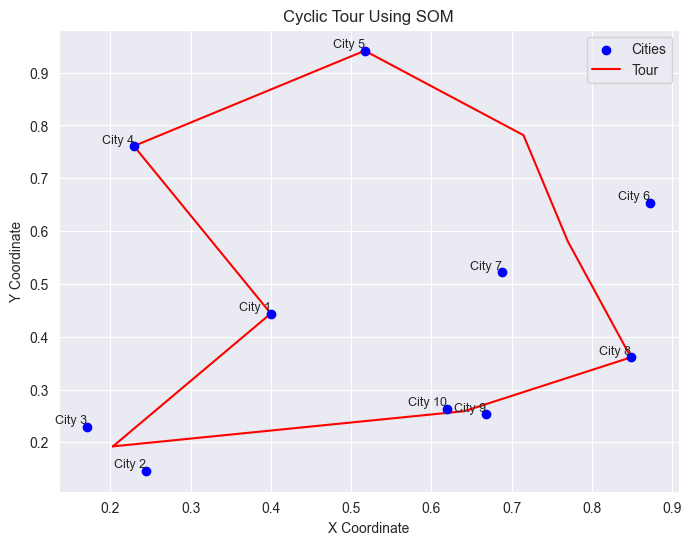

In [8]:
# Initialize the SOM
input_size = cities.shape[1]  # Should be 2 for x and y coordinates
som = SOM(input_size=input_size, num_nodes=10)

# Train the SOM
epochs = 500
som.train(cities, epochs)

# Plot the tour
som.plot_tour(cities)


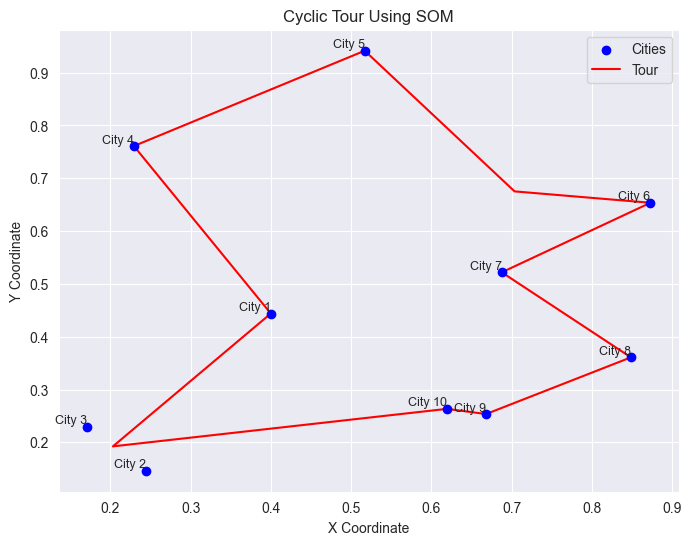

In [4]:
# Initialize the SOM
input_size = cities.shape[1]  # Should be 2 for x and y coordinates
som = SOM(input_size=input_size, num_nodes=14)

# Train the SOM
epochs = 100
som.train(cities, epochs)

# Plot the tour
som.plot_tour(cities)